In [1]:
# author: Jing
# date: May 20 2019
# function: survival analysis based on Kaplan-Meier, plot results with seaborn(slow)

In [426]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sksurv.datasets import load_veterans_lung_cancer
from sksurv.column import encode_categorical
from sksurv.metrics import concordance_index_censored

from sksurv.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
sns.set_style("whitegrid")

In [477]:
# dataset_ = "~/Downloads/tmb_mskcc_2018/"#
# filename = "data_clinical_patient.txt" #
dataset_ = "./"#"~/Box/Huang_lab/Huang_lab_data/PancanIOTmb_Samstein_NatGene2019/"
#data_ = pd.read_csv(dataset_+filename, sep = '\t', skiprows=[0,1,2,3], dtype = 'object')

filename = "gene_mutations_clinical_mskcc.txt"
data_ = pd.read_csv(dataset_+filename, sep = '\t', dtype = 'object')

In [478]:
d = {'LIVING': False, 'DECEASED': True}
data_["OS_STATUS"] = data_["OS_STATUS"].map(d)



In [479]:
''''''

data_.shape

(1610, 485)

In [480]:
time, survival_prob = kaplan_meier_estimator(data_["OS_STATUS"], data_["OS_MONTHS"])


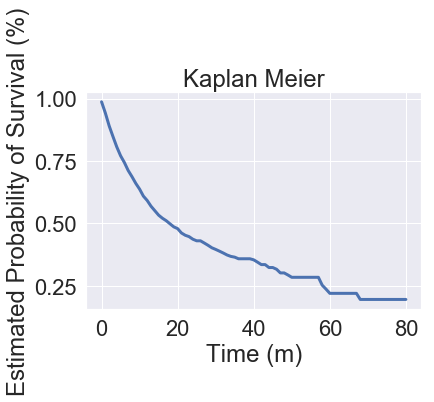

In [464]:
sns.set()
sns.set(font_scale = 2,rc={"lines.linewidth": 3})
ax = sns.lineplot(x=time, y=survival_prob)
ax.set(xlabel='Time (m)', ylabel='Estimated Probability of Survival (%)', title="Kaplan Meier")
ax.get_figure().savefig('./out/mskcc/KaplanMeier/survival.pdf')


In [465]:
data_["DRUG_TYPE"].value_counts()

PD-1/PDL-1    1265
Combo          248
CTLA4           97
Name: DRUG_TYPE, dtype: int64

PD-1/PDL-1    1265
Combo          248
CTLA4           97
Name: DRUG_TYPE, dtype: int64


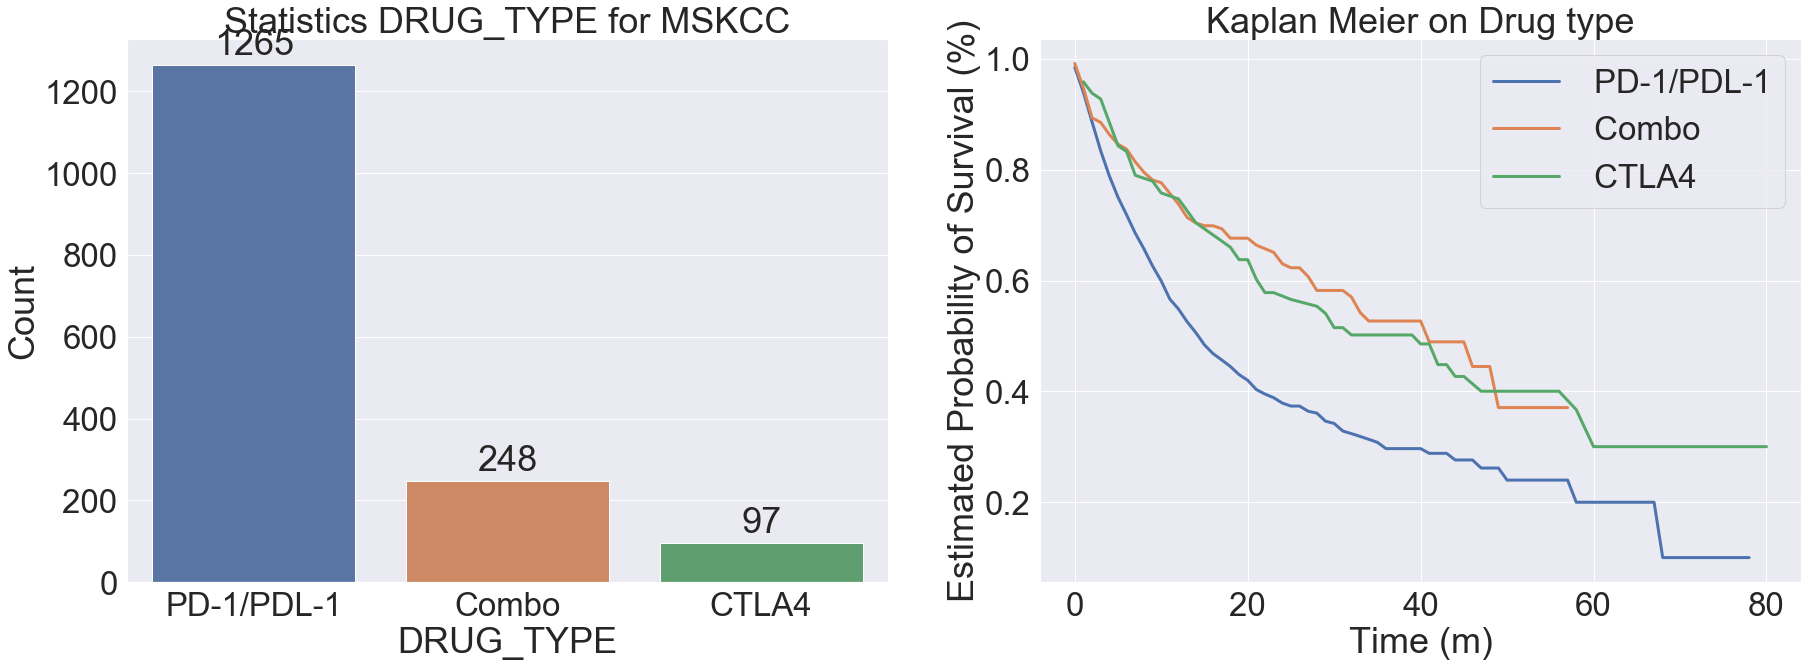

In [466]:
print(data_["DRUG_TYPE"].value_counts())

plt.figure(figsize=(30,10))
sns.set(font_scale = 3,rc={"lines.linewidth": 3})

#fig, (ax0,ax1) =plt.subplots(figsize=(10,5), ncols=2, nrows=1)
plt.subplot(1,2,1)
ax = sns.countplot(x = data_["DRUG_TYPE"])
ax.set(xlabel='DRUG_TYPE', ylabel='Count', title="Statistics DRUG_TYPE for MSKCC")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 20), textcoords='offset points') #rotation=90, 
plt.subplot(1,2,2)

for drug_type in ("PD-1/PDL-1", "Combo", "CTLA4"):
    mask_treat = data_["DRUG_TYPE"] == drug_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_["OS_STATUS"][mask_treat],
        data_["OS_MONTHS"][mask_treat])
    
    ax=sns.lineplot(x=time_treatment, y=survival_prob_treatment,label=" %s" % drug_type)
            # , drawstyle='steps-pre')''
ax.set(xlabel='Time (m)', ylabel='Estimated Probability of Survival (%)', title="Kaplan Meier on Drug type")
#ax.legend()
plt.legend(loc="best")
plt.savefig('./out/mskcc/KaplanMeier/drug_survival.pdf')


In [528]:
data_[data_["CANCER_TYPE"]=="Skin Cancer, Non-Melanoma"]

,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,...,PATIENT_ID,TMB_SCORE,SEX,OS_MONTHS,OS_STATUS,AGE_GROUP,DRUG_TYPE,ONCOTREE_CODE,SAMPLE_TYPE,CANCER_TYPE
1575,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,P-0024731,Top 10%,Male,2,False,>71,PD-1/PDL-1,CSCC,Metastasis,"Skin Cancer, Non-Melanoma"


Non-Small Cell Lung Cancer    344
Melanoma                      313
Bladder Cancer                211
Renal Cell Carcinoma          143
Head and Neck Cancer          129
Esophagogastric Cancer        118
Glioma                        116
Colorectal Cancer             109
Cancer of Unknown Primary      85
Breast Cancer                  41
Skin Cancer, Non-Melanoma       1
Name: CANCER_TYPE, dtype: int64


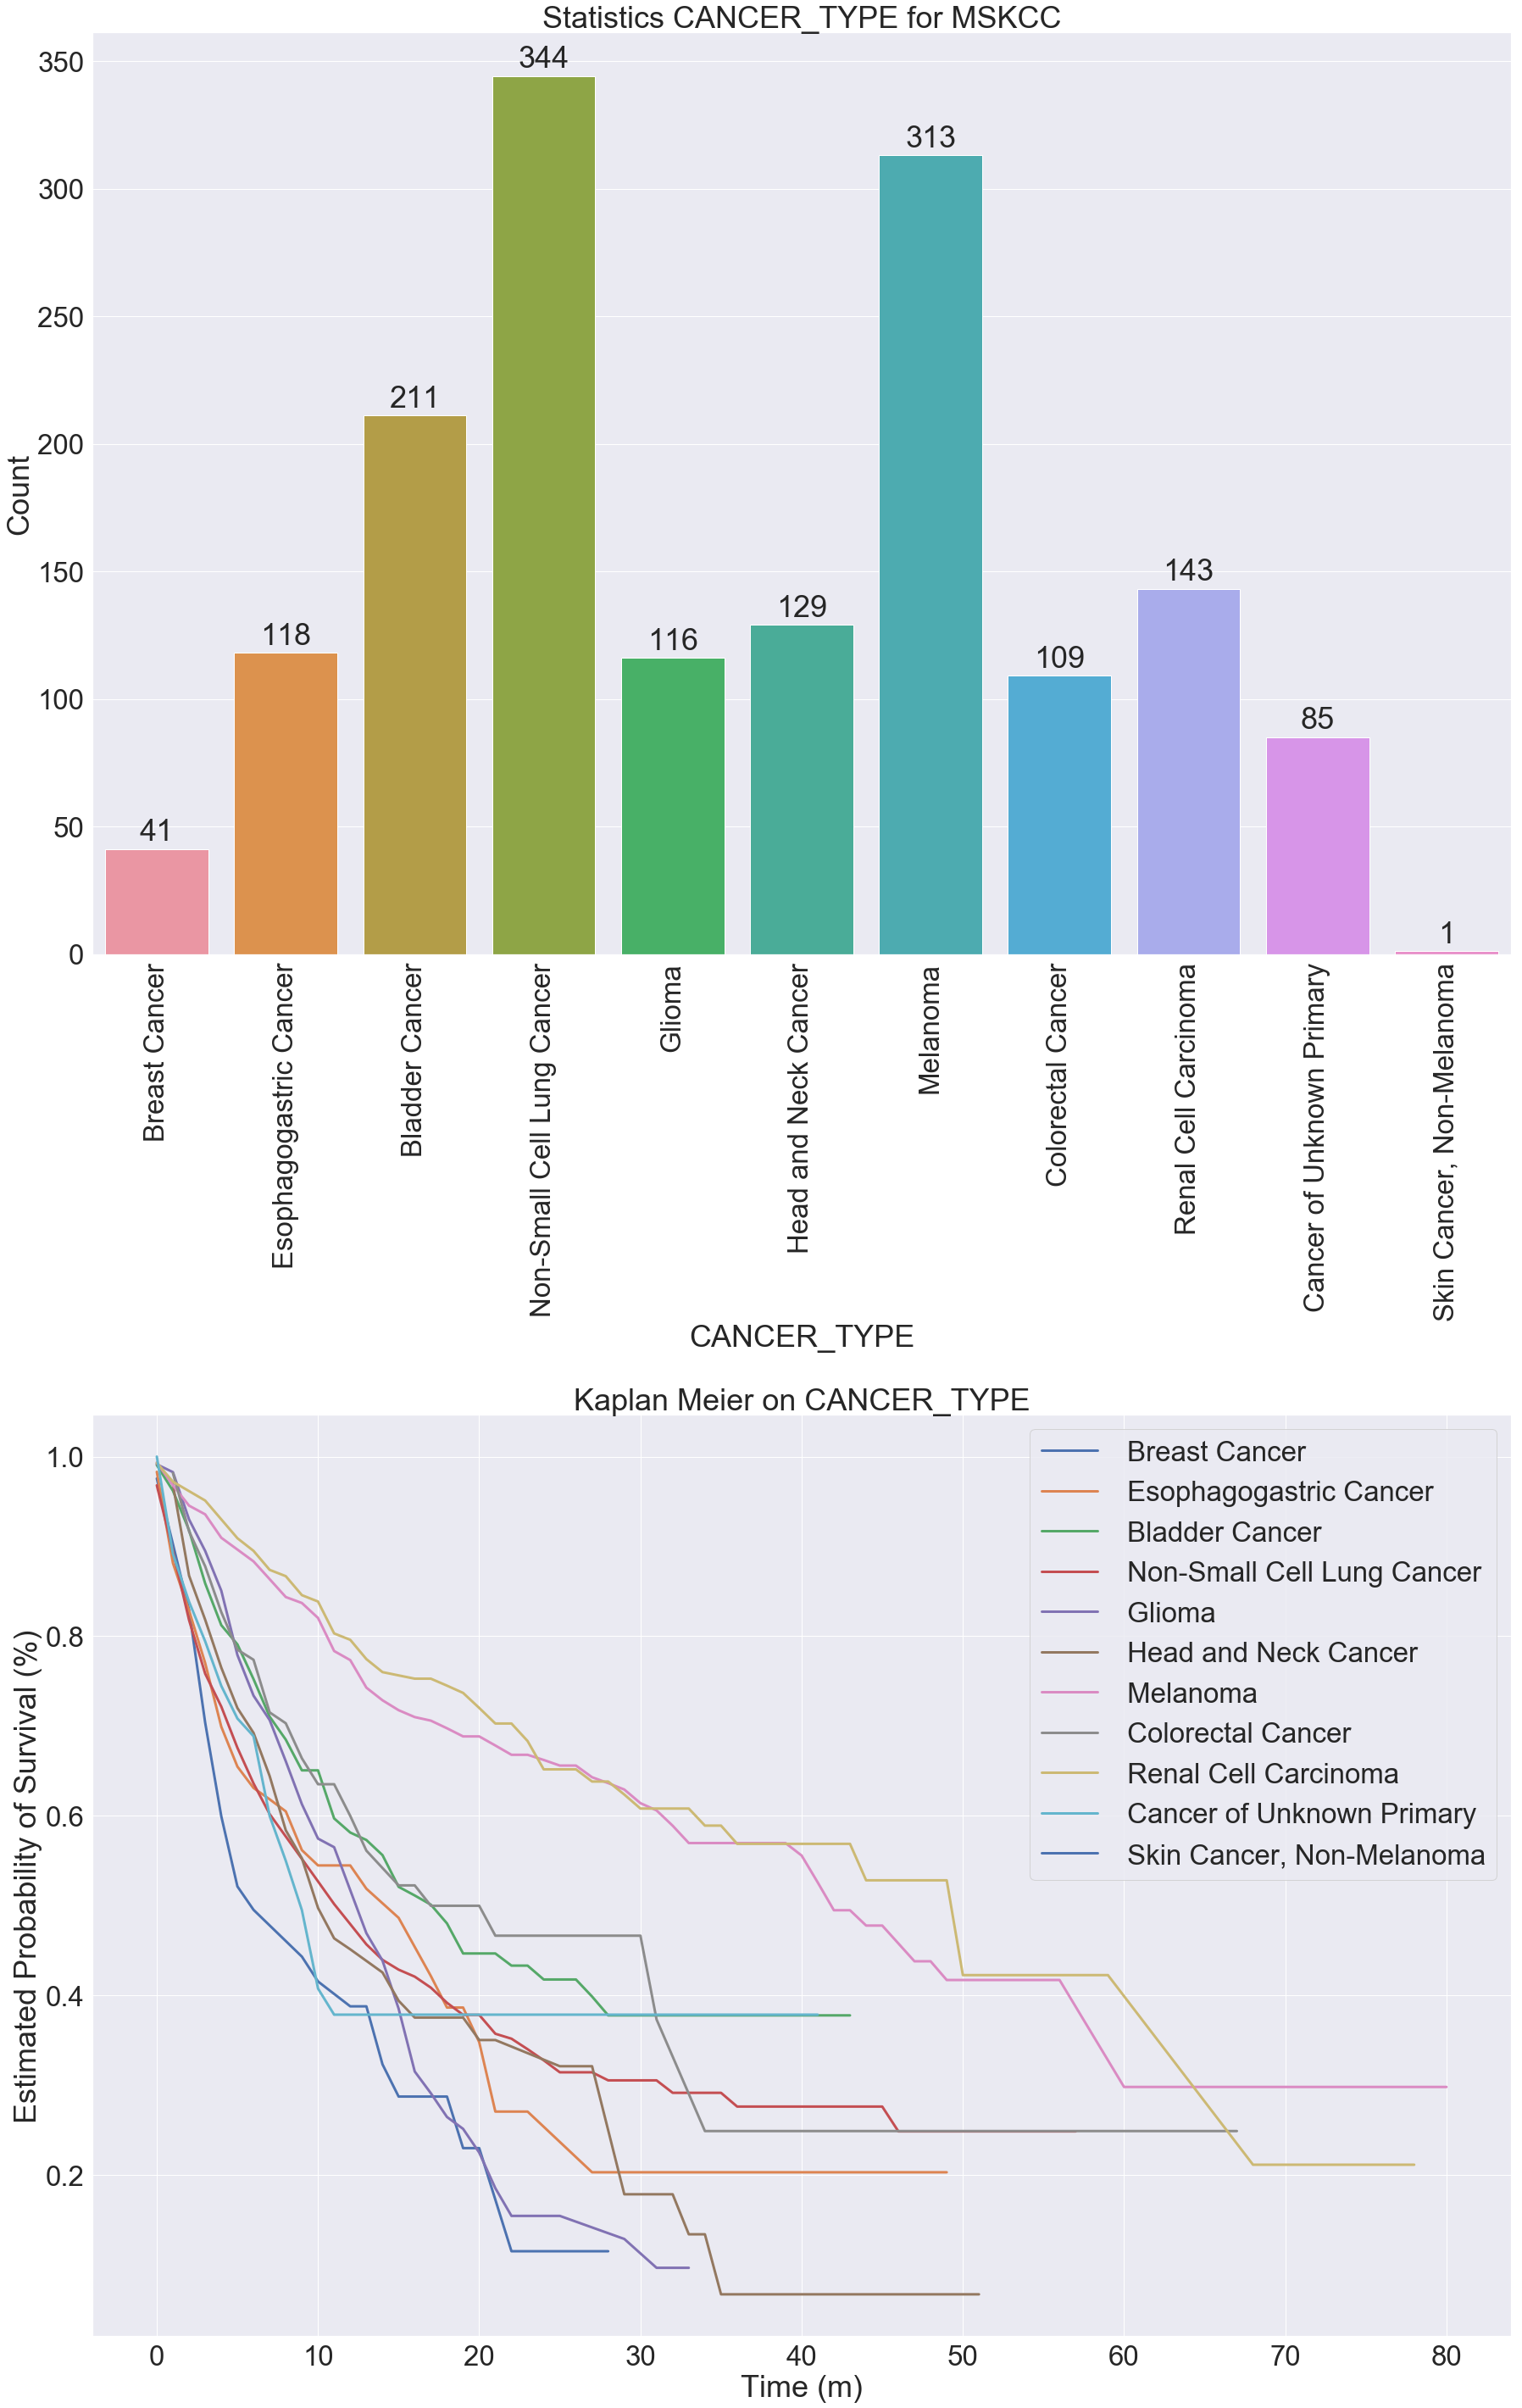

In [526]:
col = "CANCER_TYPE"

print(data_["CANCER_TYPE"].value_counts())

plt.figure(figsize=(30,50))
sns.set(font_scale = 3,rc={"lines.linewidth": 3})

#fig, (ax0,ax1) =plt.subplots(figsize=(10,5), ncols=2, nrows=1)
plt.subplot(2,1,1)
ax = sns.countplot(x = data_[col])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(xlabel=col, ylabel='Count', title="Statistics " + col + " for MSKCC")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 20), textcoords='offset points') 
    

plt.subplots_adjust(hspace=.5)
plt.subplot(2,1,2)

for drug_type in data_[col].unique():
    mask_treat = data_[col] == drug_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_["OS_STATUS"][mask_treat],
        data_["OS_MONTHS"][mask_treat])
    ax=sns.lineplot(x=time_treatment, y=survival_prob_treatment, label=" %s" % drug_type)
            # , drawstyle='steps-pre')''
ax.set(xlabel='Time (m)', ylabel='Estimated Probability of Survival (%)', title="Kaplan Meier on "+ col)
#ax.legend()
plt.legend(loc="best")
plt.savefig('./out/mskcc/KaplanMeier/' + col + '_survival.pdf')


In [496]:
a=data_["CANCER_TYPE"].unique()
a[0].split(None,1)[0]

'Breast'

Metastasis    892
Primary       718
Name: SAMPLE_TYPE, dtype: int64
Metastasis
Primary


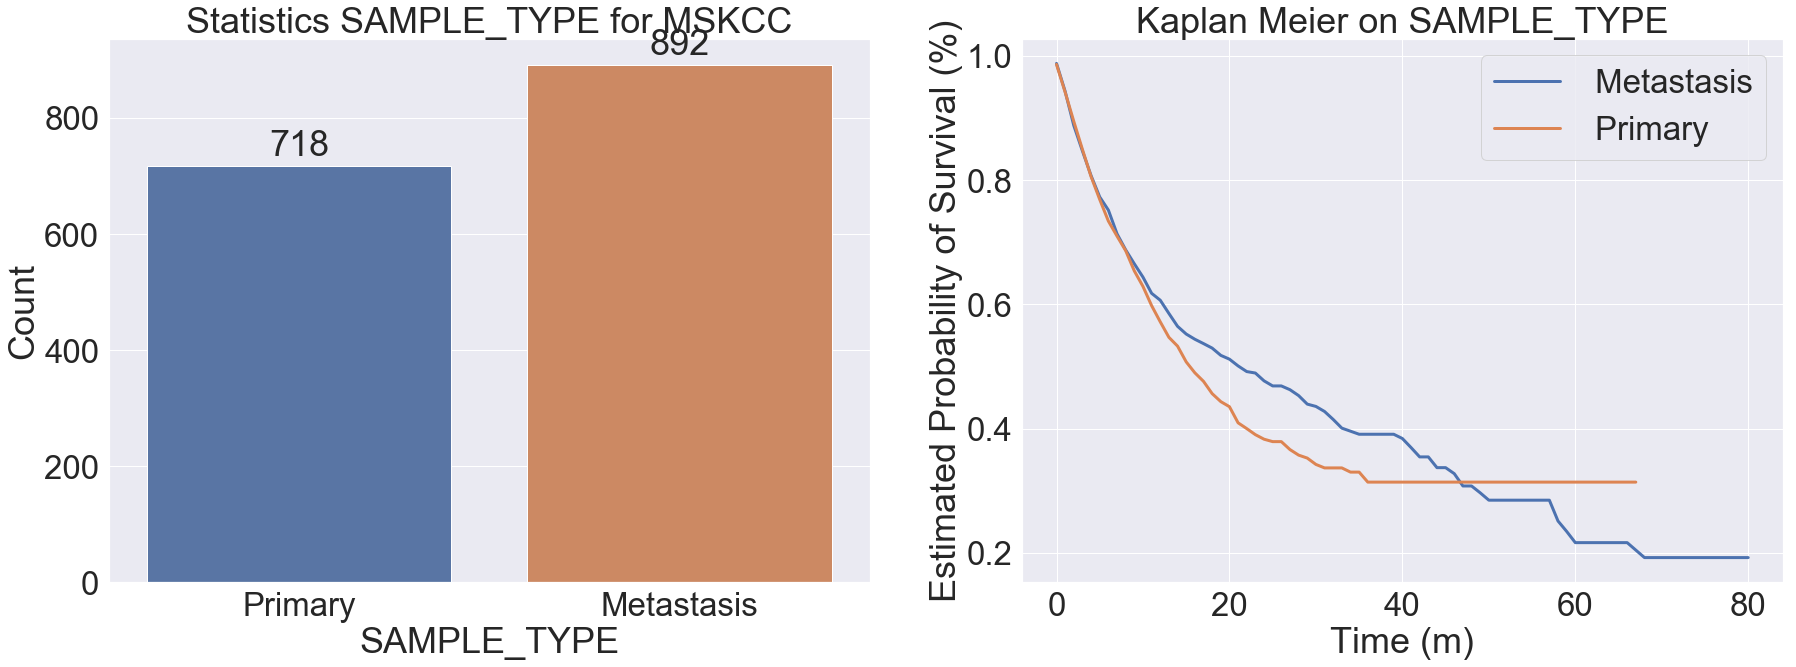

In [467]:
col = "SAMPLE_TYPE"
print(data_[col].value_counts())

plt.figure(figsize=(30,10))
sns.set(font_scale = 3,rc={"lines.linewidth": 3})

#fig, (ax0,ax1) =plt.subplots(figsize=(10,5), ncols=2, nrows=1)
plt.subplot(1,2,1)
ax = sns.countplot(x = data_[col])
ax.set(xlabel= col, ylabel='Count', title="Statistics " + col + " for MSKCC")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 20), textcoords='offset points') #rotation=90, 
plt.subplot(1,2,2)

for sample_type in ('Metastasis','Primary'):#data_[col].unique():
    mask_treat = data_[col] == sample_type
    print(sample_type)
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_["OS_STATUS"][mask_treat],
        data_["OS_MONTHS"][mask_treat])
    ax=sns.lineplot(x=time_treatment, y=survival_prob_treatment,label=" %s" % sample_type)
            # , drawstyle='steps-pre')''
ax.set(xlabel='Time (m)', ylabel='Estimated Probability of Survival (%)', title="Kaplan Meier on " + col)
plt.legend(loc="best")
plt.savefig("./out/mskcc/KaplanMeier/" + col + "_survival.pdf")


61-70    489
>71      403
50-60    400
31-50    273
<30       45
Name: AGE_GROUP, dtype: int64


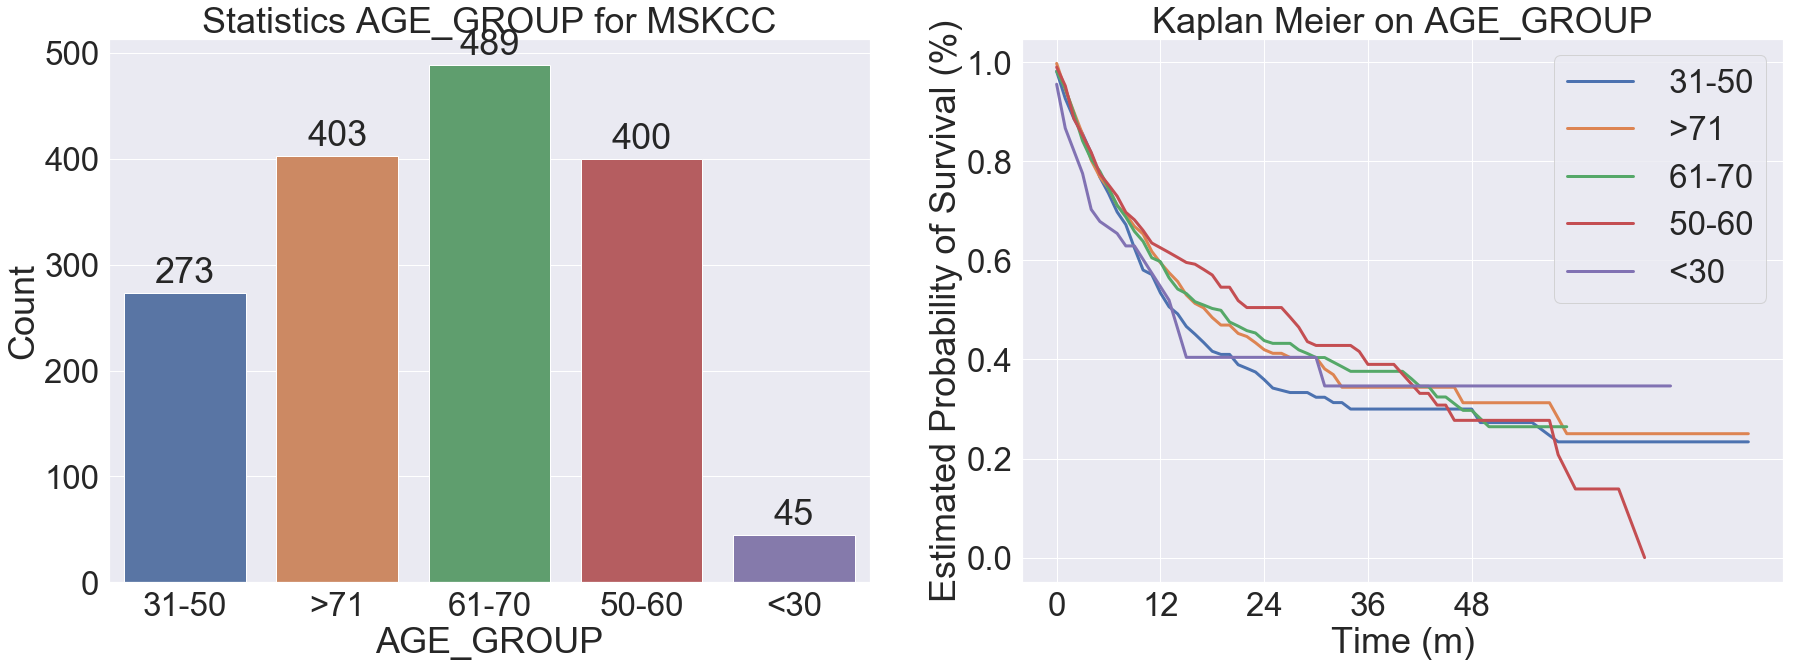

In [491]:
col = "AGE_GROUP"
print(data_[col].value_counts())

plt.figure(figsize=(30,10))
sns.set(font_scale = 3,rc={"lines.linewidth": 3})

#fig, (ax0,ax1) =plt.subplots(figsize=(10,5), ncols=2, nrows=1)
plt.subplot(1,2,1)
ax = sns.countplot(x = data_[col])
ax.set(xlabel= col, ylabel='Count', title="Statistics " + col + " for MSKCC")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 20), textcoords='offset points') #rotation=90, 
plt.subplot(1,2,2)

for sample_type in data_[col].unique():
    mask_treat = data_[col] == sample_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_["OS_STATUS"][mask_treat],
        data_["OS_MONTHS"][mask_treat])
    ax=sns.lineplot(x=time_treatment, y=survival_prob_treatment,label=" %s" % sample_type)
            # , drawstyle='steps-pre')''
ax.set(xticks=np.arange(0,60,12))
ax.set(xlabel='Time (m)', ylabel='Estimated Probability of Survival (%)', title="Kaplan Meier on " + col)
#ax.legend()
plt.legend(loc="best")
plt.savefig("./out/mskcc/KaplanMeier/" + col + "_survival.pdf")

Male      1003
Female     607
Name: SEX, dtype: int64


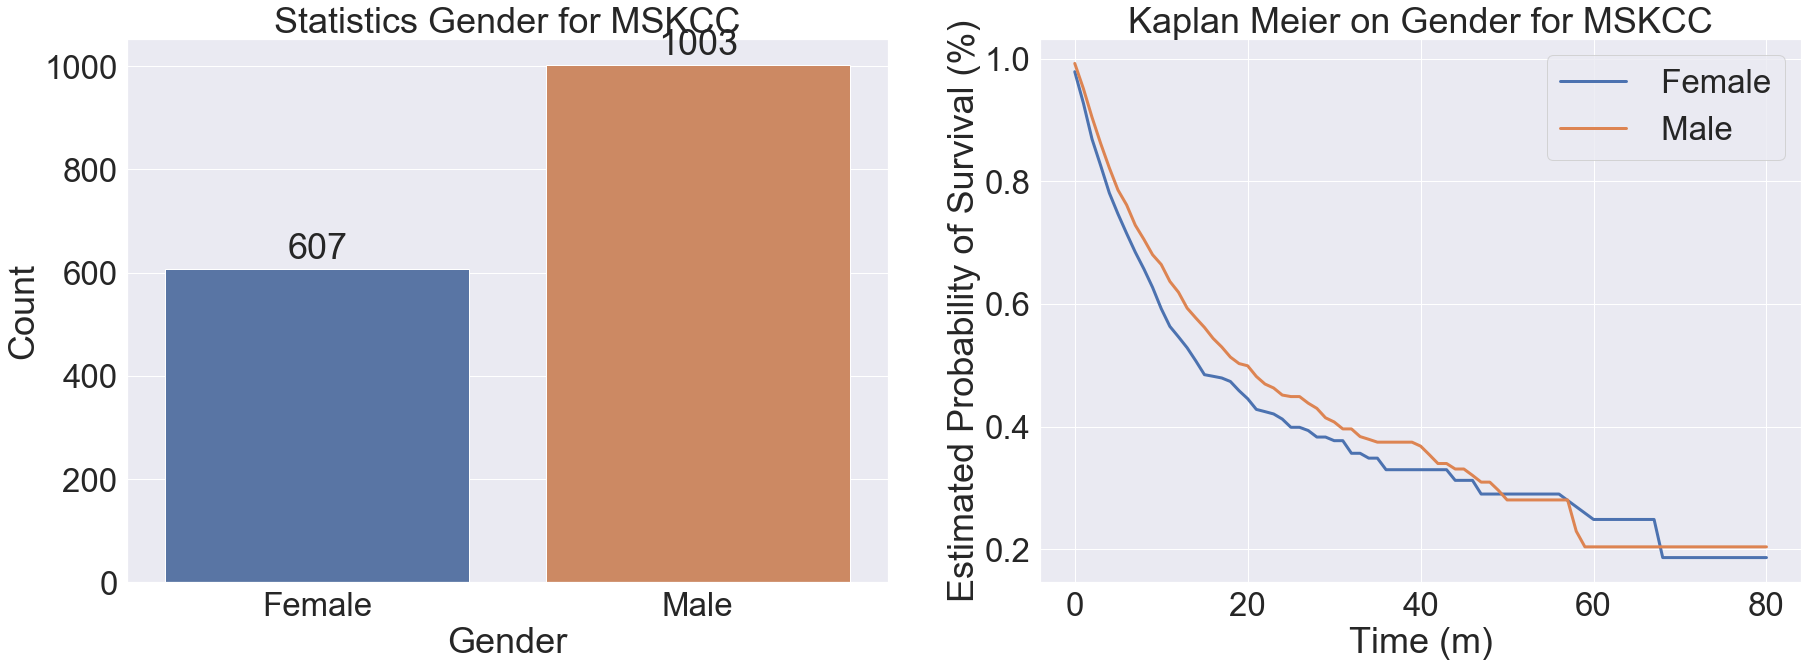

In [469]:
col = "SEX"
print(data_["SEX"].value_counts())

plt.figure(figsize=(30,10))
sns.set(font_scale = 3,rc={"lines.linewidth": 3})

#fig, (ax0,ax1) =plt.subplots(figsize=(10,5), ncols=2, nrows=1)
plt.subplot(1,2,1)
ax = sns.countplot(x = data_[col])
ax.set(xlabel='Gender', ylabel='Count', title="Statistics Gender for MSKCC")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 20), textcoords='offset points') #rotation=90, 
plt.subplot(1,2,2)

for gender_type in data_["SEX"].unique():
    mask_treat = data_["SEX"] == gender_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_["OS_STATUS"][mask_treat],
        data_["OS_MONTHS"][mask_treat])
    
    ax = sns.lineplot(x=time_treatment, y=survival_prob_treatment,label=" %s" % gender_type)#,drawstyle='steps-pre')
ax.set(xlabel='Time (m)', ylabel='Estimated Probability of Survival (%)', title="Kaplan Meier on Gender for MSKCC")
plt.legend(loc="best")
plt.savefig('./out/mskcc/KaplanMeier/' + col + '_survival.pdf')


In [470]:
# replot Fig. about TMB
num_tmb=pd.to_numeric(data_['TMB_SCORE'])
#tmbpercent = np.percentile(num_tmb,[80,90])#
#print(tmbpercent,num_tmb.min(),num_tmb.max())

In [437]:
num_tmb.shape[0]*.9

1494.9

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
No handles with labels found to put in legend.


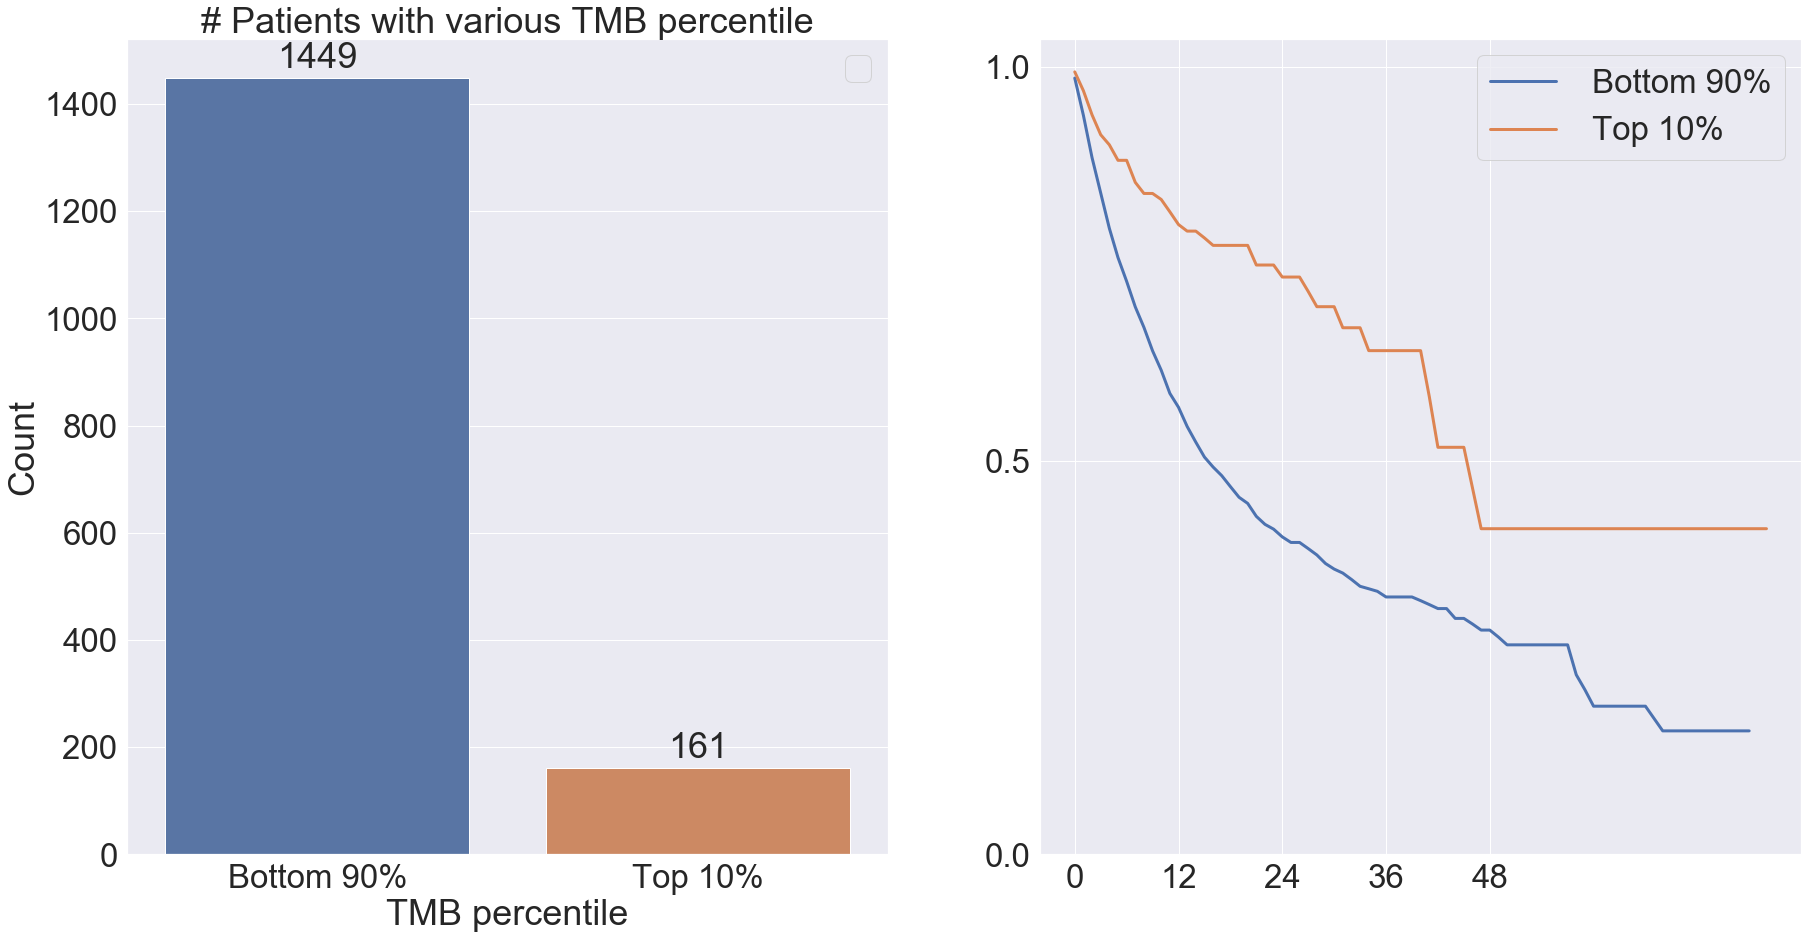

In [471]:
# top 10, bottom 90% TMB bottom 
# tmbpercent = np.percentile(num_tmb,[80,90])
# lower_bound = [a.min(), tmbpercent[0], tmbpercent[1]]
# upper_bound = np.append(tmbpercent, a.max())
plt.figure(figsize=(30,15))
sns.set(font_scale = 3, rc={"lines.linewidth": 3})
tmbtype=["Bottom 90%", "Top 10%",]#["Bottom 80%", "Top 10-20%", "Top 10%"]

#fig, (ax0,ax1) =plt.subplots(figsize=(10,5), ncols=2, nrows=1)

plt.subplot(1,2,1)
tmb = data_['TMB_SCORE']#pd.DataFrame(np.arange(a.shape[0]), columns = "TMB_SCORE",dtype=str)
i = 0
# for i in range(0,2):
#     print(i)
    #mask = np.logical_and(num_tmb >= lower_bound[i], num_tmb < upper_bound[i])
 #np.logical_and(num_tmb >= bound[i][0], num_tmb < bound[i][1])
tmb[num_tmb<np.percentile(num_tmb,90)] = tmbtype[i]
i=i+1
tmb[num_tmb>=np.percentile(num_tmb,90)] = tmbtype[i]

ax = sns.countplot(x = tmb)
ax.set(xlabel='TMB percentile', ylabel='Count', title="# Patients with various TMB percentile")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 20), textcoords='offset points') #rotation=90, 
plt.legend(loc="best")

plt.subplot(1,2,2)

i=0
mask_treat = num_tmb<26.56
time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_["OS_STATUS"][mask_treat],
        data_["OS_MONTHS"][mask_treat])
ax=sns.lineplot(x=time_treatment, y=survival_prob_treatment,label=" %s" % tmbtype[i])
ax.set(xticks = [0,12,24,36,48],yticks=[0,0.5,1])

            # , drawstyle='steps-pre')
i = i+1
mask_treat = num_tmb>=26.56
time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_["OS_STATUS"][mask_treat],
        data_["OS_MONTHS"][mask_treat])
ax=sns.lineplot(x=time_treatment, y=survival_prob_treatment,label=" %s" % tmbtype[i])
            # , drawstyle='steps-pre')

ax.set(xticks = [0,12,24,36,48],yticks=[0,0.5,1])

plt.savefig('./out/mskcc/KaplanMeier/top10bottom90TMB.pdf')

In [452]:
tmbpercent = np.percentile(num_tmb,[80,90])
tmbpercent
lower_bound = [a.min(), tmbpercent[0], tmbpercent[1]]
num_tmb.min()

0.0

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
No handles with labels found to put in legend.


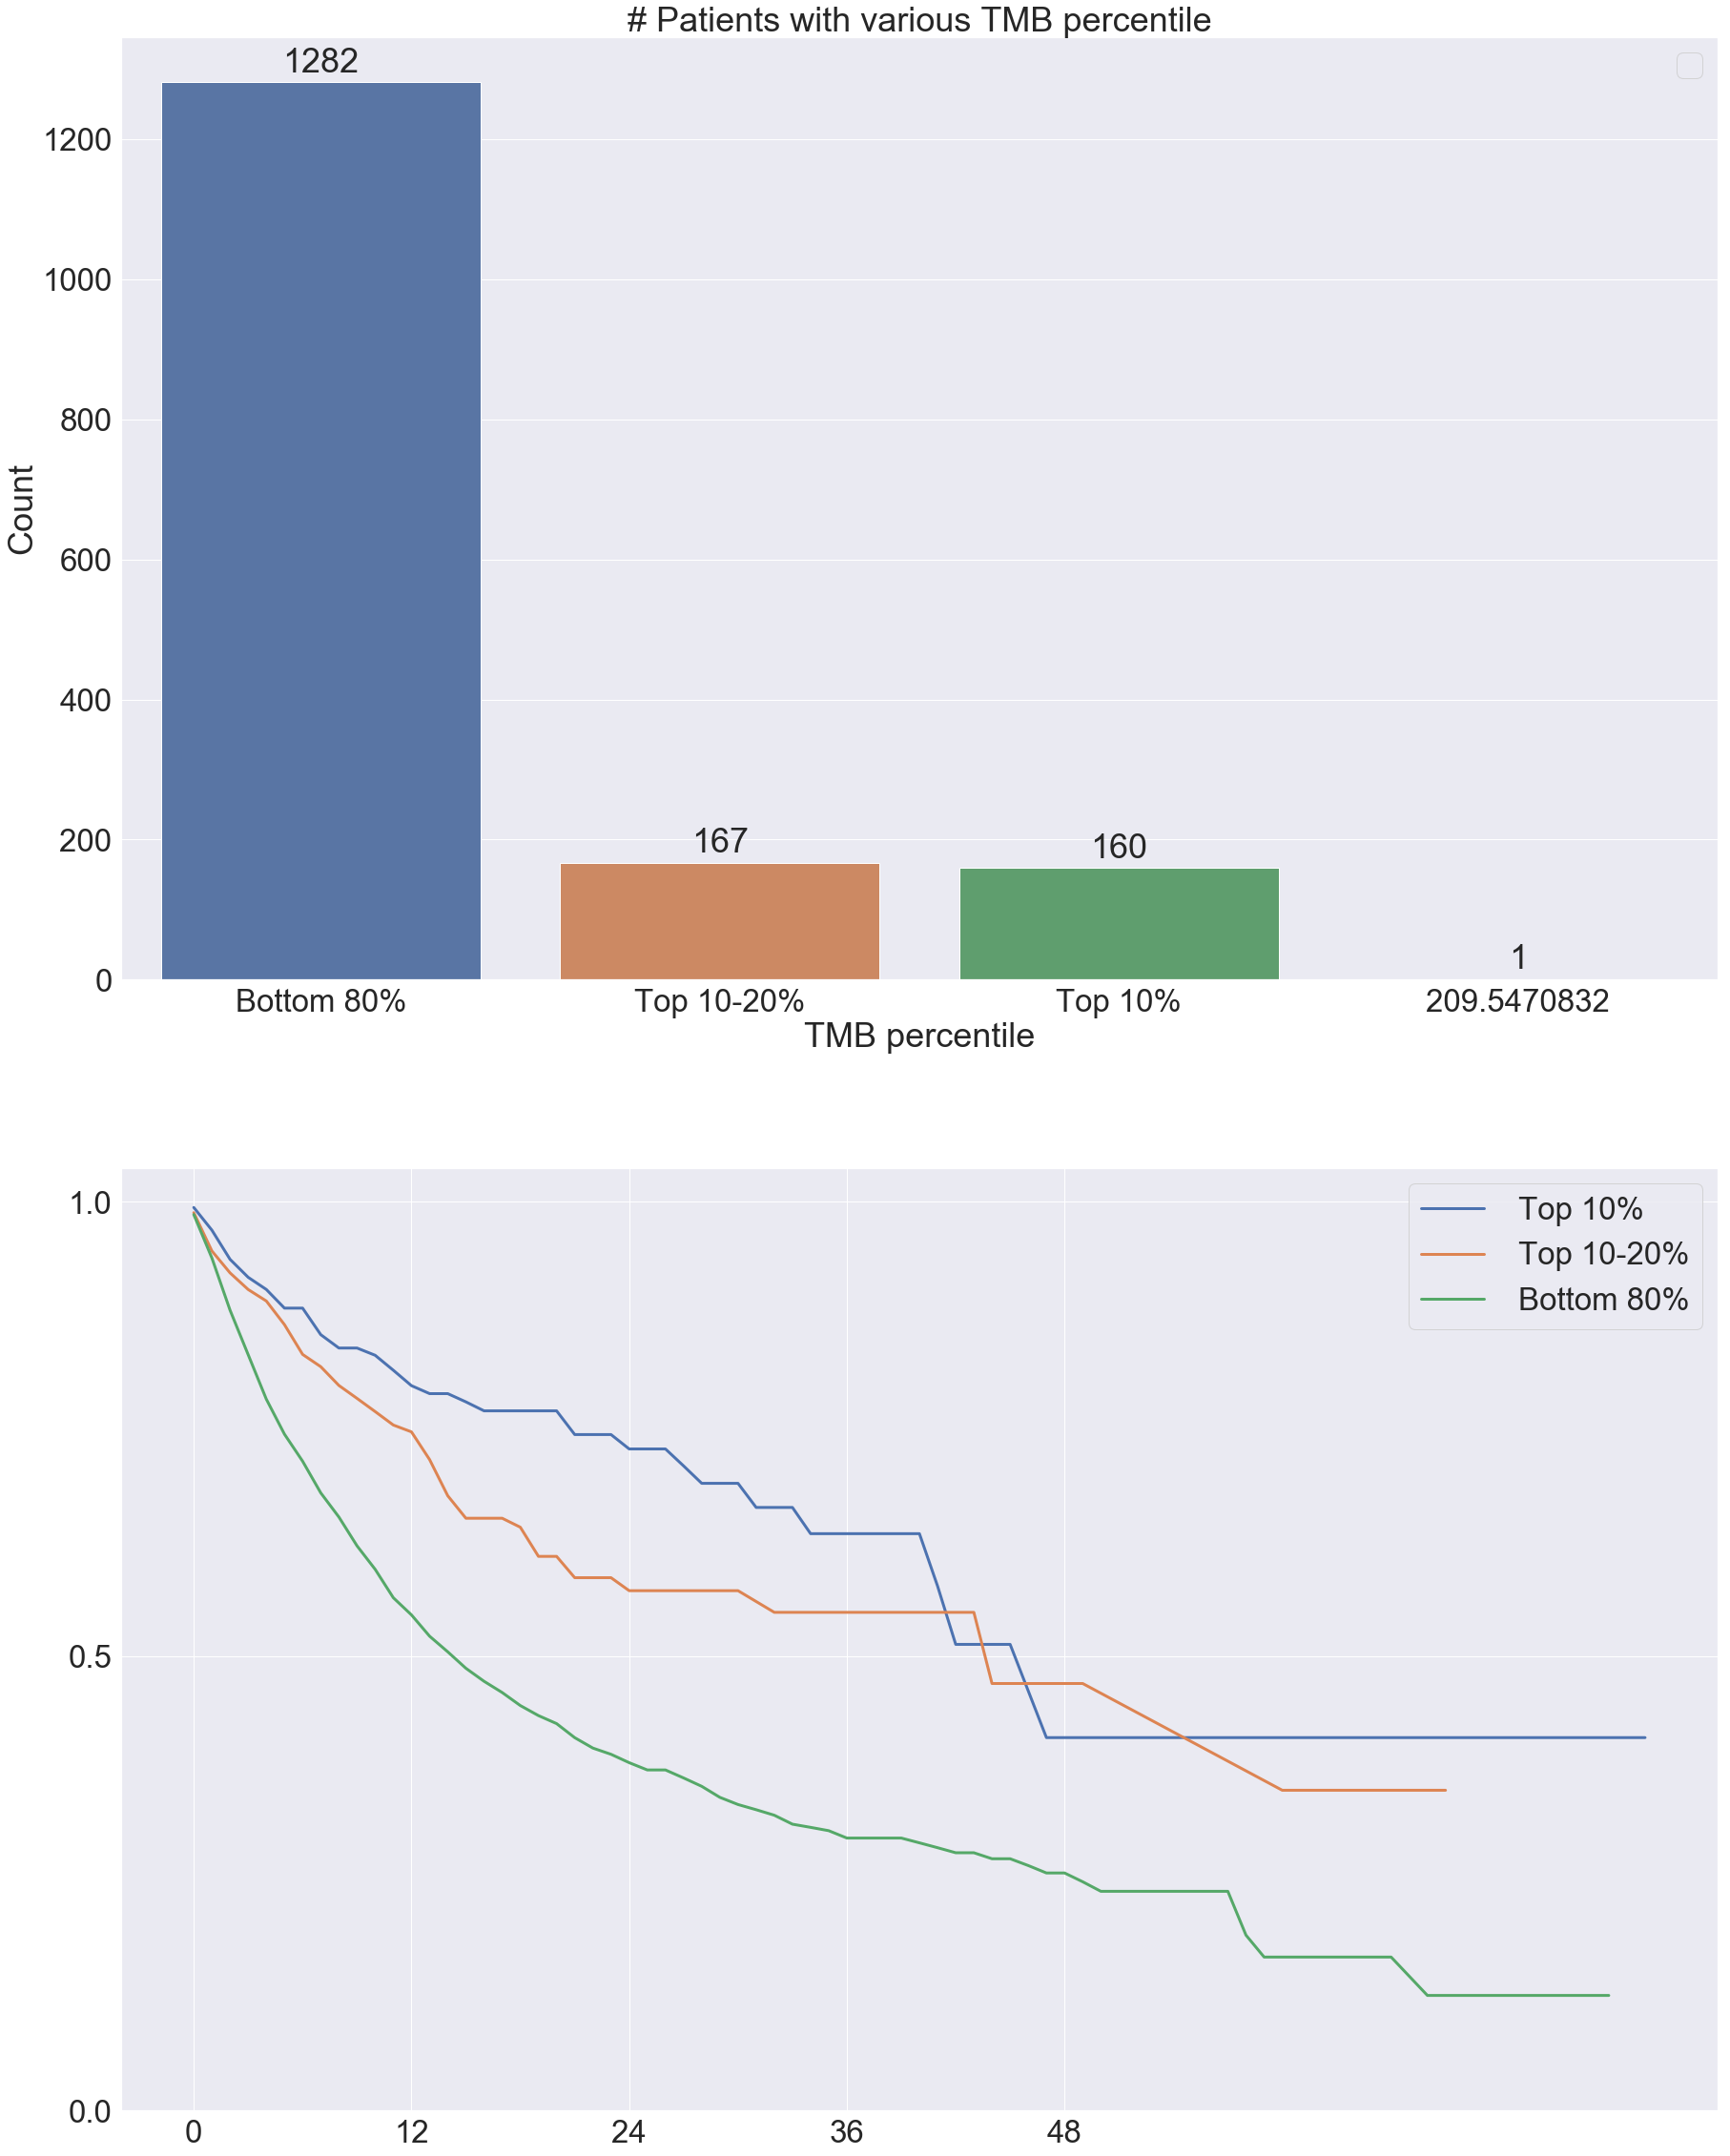

In [489]:
# top 10, 10-20% TMB bottom 80
a = data_["TMB_SCORE"]
tmbpercent = np.percentile(num_tmb,[80,90])
lower_bound = [num_tmb.min(), tmbpercent[0], tmbpercent[1]]
upper_bound = np.append(tmbpercent, num_tmb.max())

plt.figure(figsize=(30,40))
sns.set(font_scale = 3, rc={"lines.linewidth": 3})
tmbtype=["Bottom 80%", "Top 10-20%", "Top 10%"]

#fig, (ax0,ax1) =plt.subplots(figsize=(10,5), ncols=2, nrows=1)

plt.subplot(2,1,1)
tmb = data_['TMB_SCORE']#pd.DataFrame(np.arange(a.shape[0]), columns = "TMB_SCORE",dtype=str)
for i in range(0,3):
    mask = np.logical_and( num_tmb >= lower_bound[i], num_tmb < upper_bound[i])
    tmb[mask] = tmbtype[i]
ax = sns.countplot(x = tmb)
ax.set(xlabel='TMB percentile', ylabel='Count', title="# Patients with various TMB percentile")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 20), textcoords='offset points') #rotation=90, 
plt.legend(loc="best")

plt.subplot(2,1,2)

for i in range(2,-1,-1):
    mask_treat = np.logical_and(num_tmb >= lower_bound[i], num_tmb <  upper_bound[i])
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_["OS_STATUS"][mask_treat],
        data_["OS_MONTHS"][mask_treat])
    ax=sns.lineplot(x=time_treatment, y=survival_prob_treatment,label=" %s" % tmbtype[i])
            # , drawstyle='steps-pre')
    ax.set(xticks = [0,12,24,36,48],yticks=[0,0.5,1])
plt.savefig('./out/mskcc/KaplanMeier/top1020bottom80TMB.pdf')